1.Download the dataset, unzip and explore the file folders. Load the image dataset
with training and testing grouped. (Note, cv2 reads and saves in BGR channel order)

(([], []), ([], []))

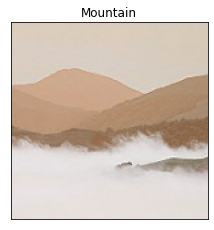

In [1]:
import cv2, os, matplotlib.pyplot as plt, numpy as np, tensorflow.keras.models as Models, tensorflow.keras.layers as Layers, tensorflow.keras.optimizers as Optimizer, tensorflow.keras.metrics as Metrics, tensorflow.keras.utils as Utils
from random import randint
from tensorflow import keras

directory = '/Users/samlasker/Documents/Applied Machine Learning/seg_train/seg_train/'
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
X_tr, y_tr, X_ts, y_ts = [], [], [], []

for label in CNAMES:
    path = directory + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_tr += [CNAMES.index(label)]

#There are 3 color channels for each image              

m='/Users/samlasker/Documents/Applied Machine Learning/seg_train/seg_train/mountain/14986.jpg'
plt.figure(1, figsize = (12 , 12))
plt.subplot(2 , 3 , 1)
plt.imshow(cv2.imread(m))
plt.title('Mountain')
plt.xticks([]) , plt.yticks([])

In [2]:
#2[20 pts] Convert the imageset to numpy array, such as the array size:
#(14034, 128, 128, 3)
#Scale the imageset to [0-1]

Images, Labels = X_tr, y_tr
Images = np.array(Images) #convert the imageset to numpy array
Labels = np.array(Labels)

print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 128, 128, 3)
Shape of Labels: (14034,)


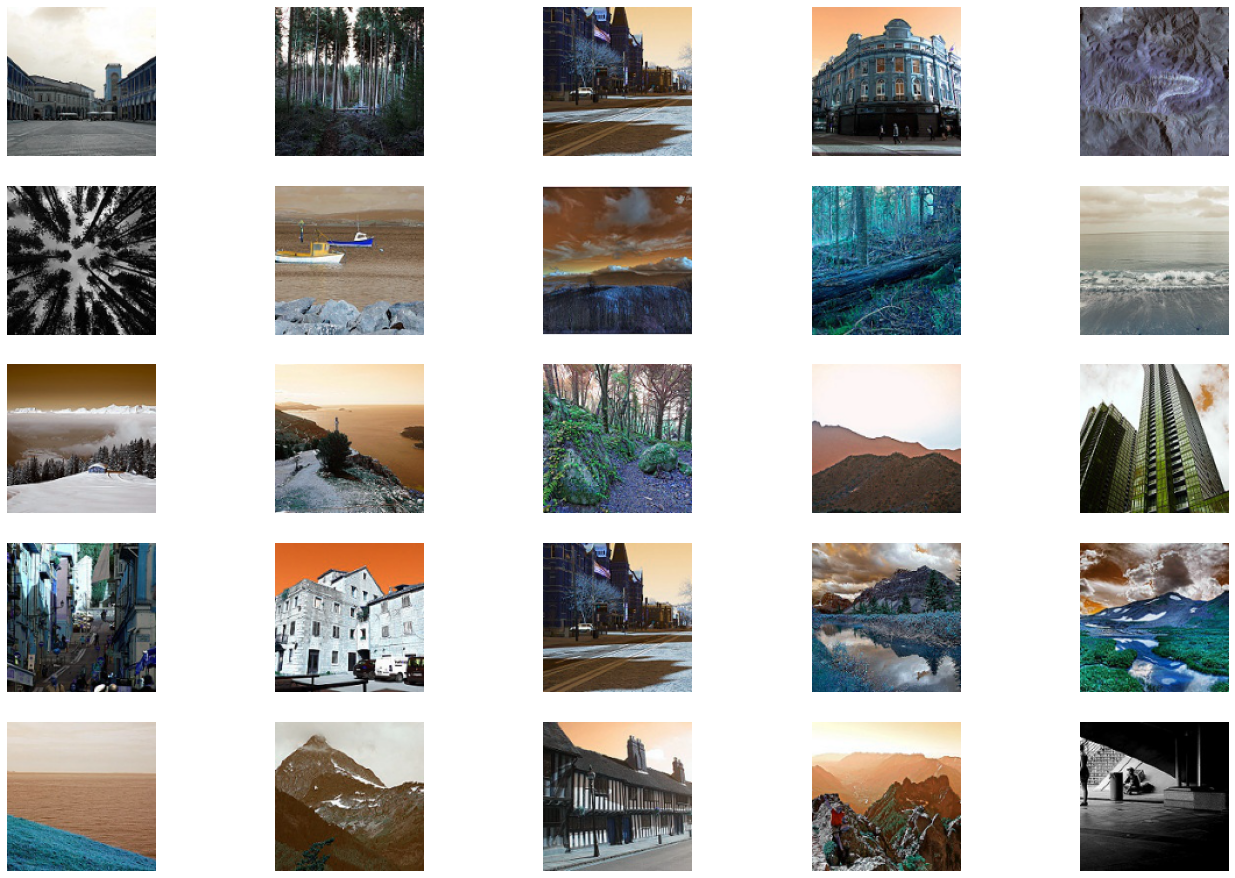

In [3]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        #ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')


In [4]:
#3. Create a neural network to train and report its performance on the testing portion of
#the dataset. 60% reclassification and 55% testing performance should be achievable
#without any hyperparameter tuning.

import pydot
import graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))
#Utils.plot_model(model,to_file='model.png',show_shapes=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 100)       126100    
                                                        

2022-05-01 16:24:54.718013: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/samlasker/opt/anaconda3/envs/torch/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Epoch 1/35
307/307 [==============================] - 15505s 51s/step - loss: 1.2892 - accuracy: 0.5143 - val_loss: 4.0860 - val_accuracy: 0.0000e+00
Epoch 2/35
 71/307 [=====>........................] - ETA: 22:08 - loss: 0.9973 - accuracy: 0.6369

KeyboardInterrupt: 

Epoch 1/35
307/307 [==============================] - ETA: 0s - loss: 1.2892 - accuracy: 0.5143 

In [ ]:
4. [10 pts] Research and find out how to improve the neural network model to solve this
problem. Outline an approach.